# Life Expectancy Prediction using Multiple Linear Regression

Introduction

Linear regression is one of types supervised machine learning algorithms which predict continuous value outputs.
Term of linear regression refers to relationship between two or more variable, where 'x' is variable predictor as independent variable and 'y' is variable target as dependent variable. Relationship between two variable called Simple Linear Regression, whilst relationship between more than two variable called Multiple Linear Regression.


# Data Preparation

In [82]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from patsy import dmatrices
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import winsorize
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Read Data

In [83]:
# data=pd.read_csv('Life Expectancy Data.csv')
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fc6149441fef45e394b6af2f99827c6f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DADyosjuHRgbciww4Z7hoDVO95d9IeCnrbaGtGE-EGpn',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_fc6149441fef45e394b6af2f99827c6f.get_object(Bucket='lifeexpectancy-donotdelete-pr-nazxuxjseoibxh',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data= pd.read_csv(body)
data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [84]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [85]:
data.shape

(2938, 22)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [87]:
data[['Country','Status']] = data[['Country','Status']].astype('category')

In [88]:
data['Country'].nunique()

193

In [89]:
# Remove variable 'country'

data.drop(['Country'], axis=1, inplace=True)

In [90]:
#rename column
orig_cols = list(data.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
data.columns = new_cols

data.rename(columns={'thinness_1-19_years':'thin_1','thinness_5-9_years':'thin_5','hiv/aids':'hivaids','under-five_deaths':\
                    'under_five_deaths'}, inplace=True)

# # convert columns name into lowercase
# df.columns = map(str.lower, df.columns)
# df

# Variable Description

country : the country in which the indicators are from

year : the calendar year the indicators are from (ranging from 2000 to 2015)

status : whether a country is considered to be 'Developing' or 'Developed' by WHO standards

life_expectancy : the life expectancy of people in years for a particular country and year

adult_mortality : the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

infant_deaths :number of infant deaths per 1000 population; similar to above, but for infants

alcohol : a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

percentage_expenditure : expenditure on health as a percentage of Gross Domestic Product (gdp)

hepatitis_b : number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

measles : number of reported Measles cases per 1000 population

bmi : average Body Mass Index (BMI) of a country's total population

under-five_deaths : number of people under the age of five deaths per 1000 population

polio : number of 1 year olds with Polio immunization over the number of all 1 year olds in population

total_expenditure : government expenditure on health as a percentage of total government expenditure

diphtheria : Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds

hiv/aids: deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births

gdp : Gross Domestic Product per capita

population : population of a country

thinness_1-19_years: rate of thinness among people aged 10-19

thinness_5-9_years : rate of thinness among people aged 5-9

income_composition_of_resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
schooling : average number of years of schooling of a population

In [91]:
# Determined predictor and target variable
# Since we want to predict Life Expectancy of population, so target variable ('y') from this data is life_expectancy, and the rest used as predictor variable.



In [92]:
# Identify percentage of null values in each column.
data.isna().sum()*100/data.isna().count()
# df.isnull().sum()

year                               0.000
status                             0.000
life_expectancy                    0.340
adult_mortality                    0.340
infant_deaths                      0.000
alcohol                            6.603
percentage_expenditure             0.000
hepatitis_b                       18.822
measles                            0.000
bmi                                1.157
under_five_deaths                  0.000
polio                              0.647
total_expenditure                  7.692
diphtheria                         0.647
hivaids                            0.000
gdp                               15.248
population                        22.192
thin_1                             1.157
thin_5                             1.157
income_composition_of_resources    5.684
schooling                          5.548
dtype: float64

In [93]:
year_list = data.year.unique()
fill_list = ['life_expectancy','adult_mortality','alcohol','hepatitis_b','bmi','polio','total_expenditure',\
             'diphtheria','gdp','population','thin_1','thin_5','income_composition_of_resources',\
             'schooling']

for year in year_list:
    data.loc[data['year'] == year,fill_list] = data.loc[data['year'] == year,fill_list].interpolate()

data.dropna(inplace=True)
data.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hivaids,gdp,population,thin_1,thin_5,income_composition_of_resources,schooling
count,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000
mean,2007.519,69.225,164.851,30.304,4.734,738.251,79.569,2419.592,38.355,42.036,82.561,5.955,82.343,1.742,7920.787,11981853.032,4.863,4.898,0.635,12.079
std,4.614,9.508,124.129,117.927,3.983,1987.915,24.912,11467.272,19.968,160.446,23.375,2.408,23.665,5.078,14136.054,54777438.383,4.411,4.500,0.209,3.318
min,2000.000,36.300,1.000,0.000,0.010,0.000,1.000,0.000,1.000,0.000,3.000,0.370,2.000,0.100,1.681,34.000,0.100,0.100,0.000,0.000
25%,2004.000,63.200,74.000,0.000,1.093,4.685,74.000,0.000,19.400,0.000,78.000,4.370,78.000,0.100,544.024,289676.000,1.600,1.600,0.501,10.200
50%,2008.000,72.000,144.000,3.000,4.070,64.913,91.000,17.000,43.300,4.000,93.000,5.920,93.000,0.100,2244.485,1544221.000,3.400,3.400,0.684,12.400
75%,2012.000,75.600,227.000,22.000,7.810,441.534,96.000,360.250,56.100,28.000,97.000,7.390,97.000,0.800,6957.891,7280901.750,7.200,7.300,0.788,14.300
max,2015.000,89.000,723.000,1800.000,17.870,19479.912,99.000,212183.000,87.300,2500.000,99.000,17.600,99.000,50.600,119172.742,1293859294.000,27.700,28.600,0.948,20.700


# check outliers

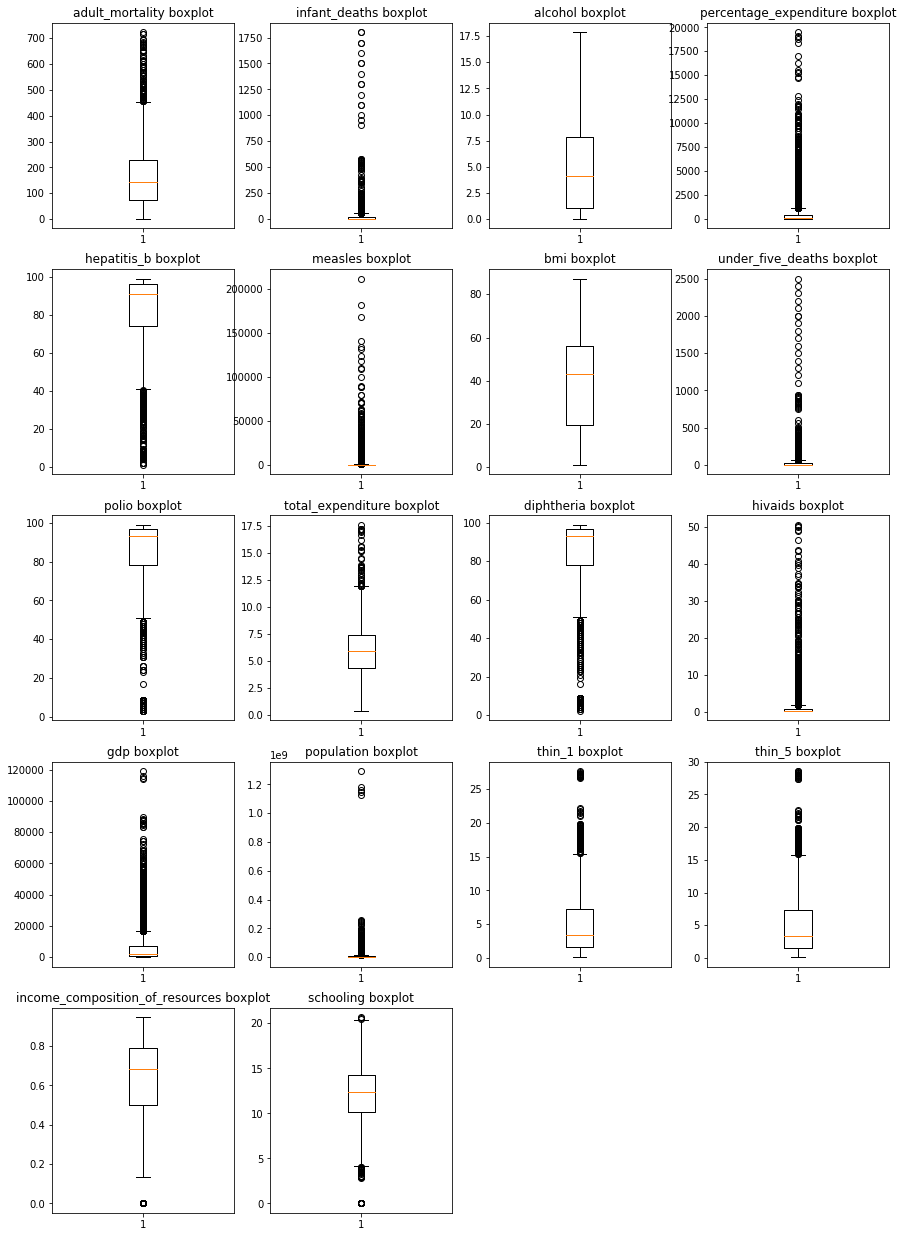

In [94]:
cont_vars = list(data.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
    plt.show()
outliers_visual(data)

# Remove outliers

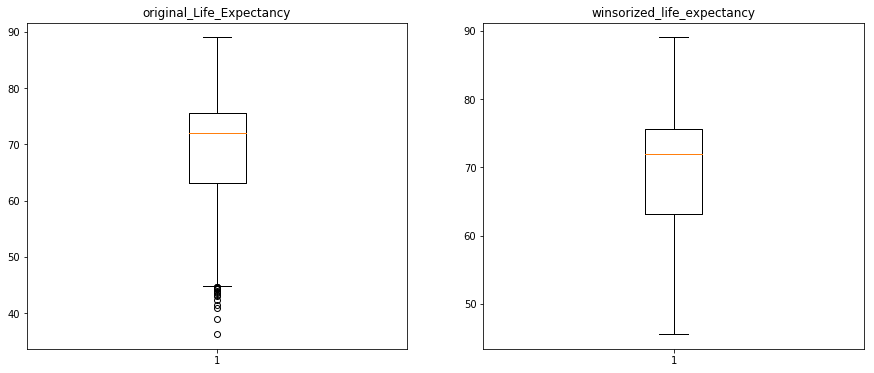

In [95]:
data_without_outliers = data.copy()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
original_life_expectancy = data_without_outliers['life_expectancy']
plt.boxplot(original_life_expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_life_expectancy = winsorize(data_without_outliers['life_expectancy'],(0.01,0))
plt.boxplot(winsorized_life_expectancy)
plt.title("winsorized_life_expectancy")

plt.show()

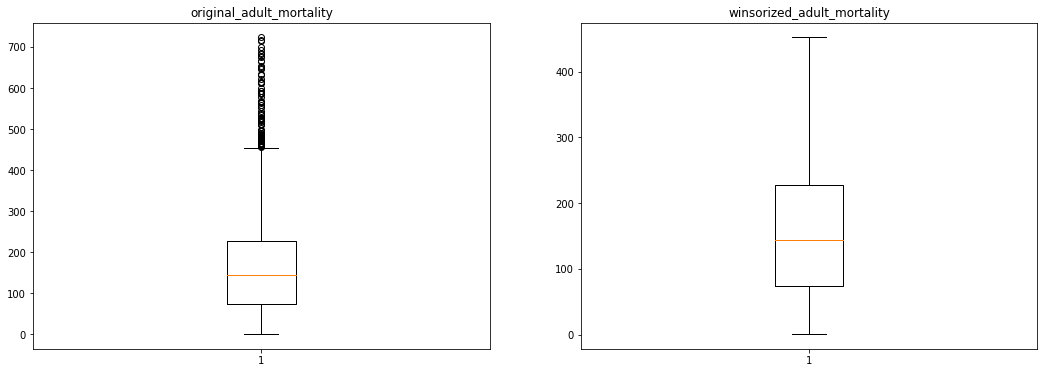

In [96]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_adult_mortality = data_without_outliers['adult_mortality']
plt.boxplot(original_adult_mortality)
plt.title("original_adult_mortality")

plt.subplot(1,2,2)
winsorized_adult_mortality = winsorize(data_without_outliers['adult_mortality'],(0,0.03))
plt.boxplot(winsorized_adult_mortality)
plt.title("winsorized_adult_mortality")

plt.show()

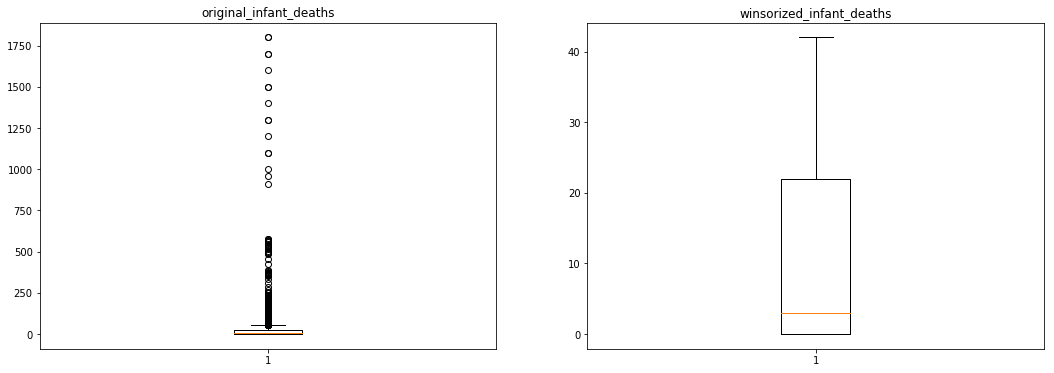

In [97]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_infant_deaths = data_without_outliers['infant_deaths']
plt.boxplot(original_infant_deaths)
plt.title("original_infant_deaths")

plt.subplot(1,2,2)
winsorized_infant_deaths = winsorize(data_without_outliers['infant_deaths'],(0,0.15))
plt.boxplot(winsorized_infant_deaths)
plt.title("winsorized_infant_deaths")

plt.show()

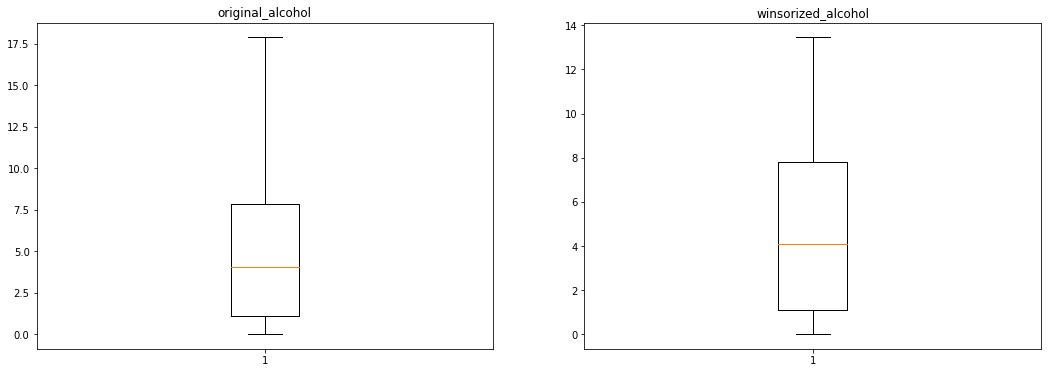

In [98]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_alcohol = data_without_outliers['alcohol']
plt.boxplot(original_alcohol)
plt.title("original_alcohol")

plt.subplot(1,2,2)
winsorized_alcohol = winsorize(data_without_outliers['alcohol'],(0,0.01))
plt.boxplot(winsorized_alcohol)
plt.title("winsorized_alcohol")

plt.show()

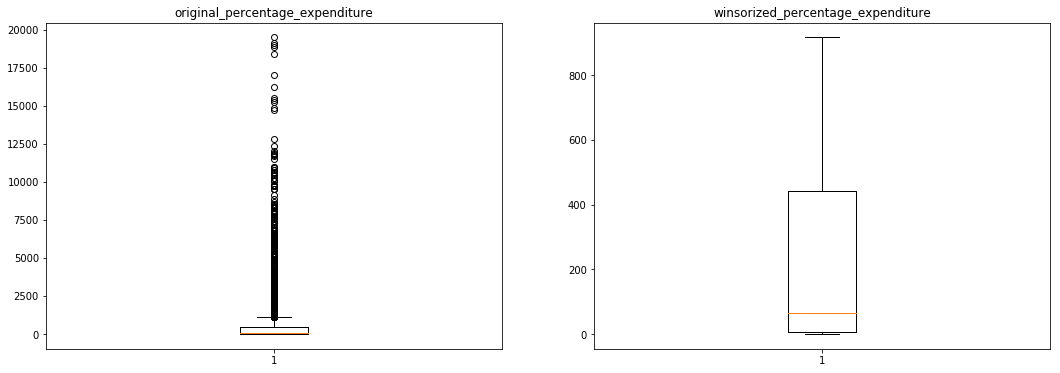

In [99]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_percentage_expenditure = data_without_outliers['percentage_expenditure']
plt.boxplot(original_percentage_expenditure)
plt.title("original_percentage_expenditure")

plt.subplot(1,2,2)
winsorized_percentage_expenditure = winsorize(data_without_outliers['percentage_expenditure'],(0,0.15))
plt.boxplot(winsorized_percentage_expenditure)
plt.title("winsorized_percentage_expenditure")

plt.show()


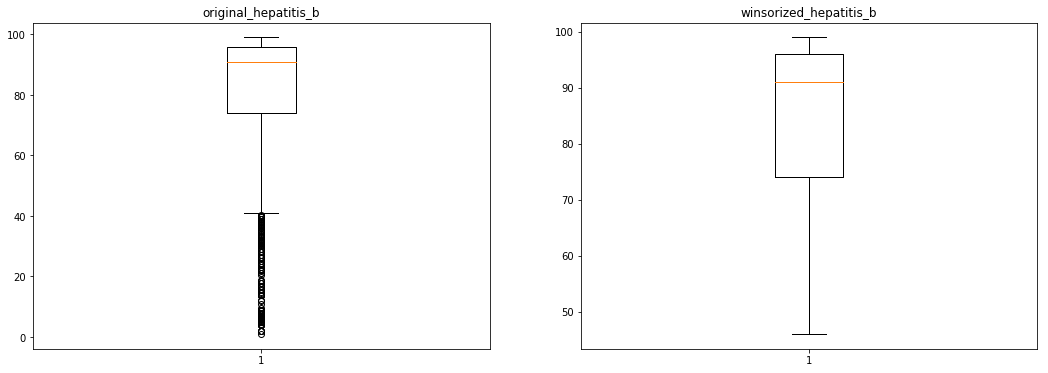

In [100]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_hepatitis_b = data_without_outliers['hepatitis_b']
plt.boxplot(original_hepatitis_b)
plt.title("original_hepatitis_b")

plt.subplot(1,2,2)
winsorized_hepatitis_b = winsorize(data_without_outliers['hepatitis_b'],(0.11,0))
plt.boxplot(winsorized_hepatitis_b)
plt.title("winsorized_hepatitis_b")

plt.show()


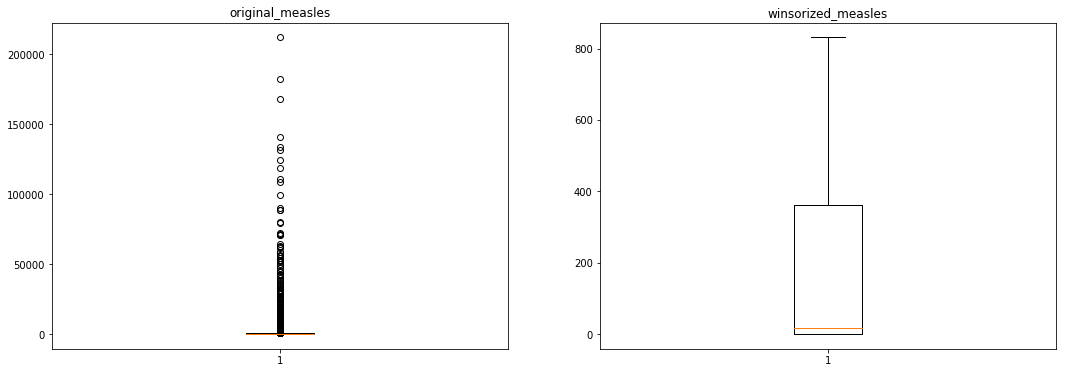

In [101]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_measles = data_without_outliers['measles']
plt.boxplot(original_measles)
plt.title("original_measles")

plt.subplot(1,2,2)
winsorized_measles = winsorize(data_without_outliers['measles'],(0,0.19))
plt.boxplot(winsorized_measles)
plt.title("winsorized_measles")

plt.show()

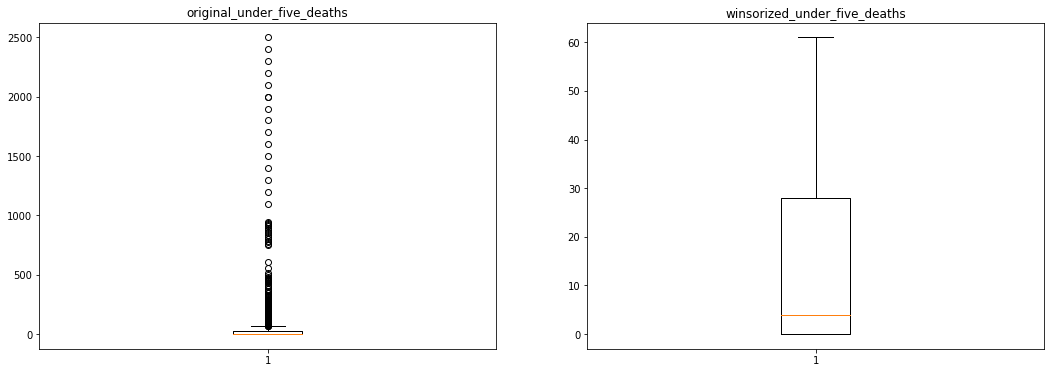

In [102]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_under_five_deaths = data_without_outliers['under_five_deaths']
plt.boxplot(original_under_five_deaths)
plt.title("original_under_five_deaths")

plt.subplot(1,2,2)
winsorized_under_five_deaths = winsorize(data_without_outliers['under_five_deaths'],(0,0.15))
plt.boxplot(winsorized_under_five_deaths)
plt.title("winsorized_under_five_deaths")

plt.show()

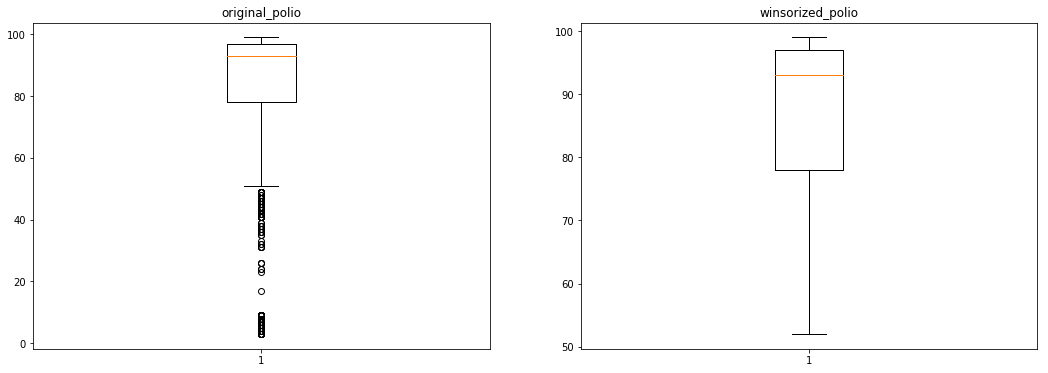

In [103]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_polio = data_without_outliers['polio']
plt.boxplot(original_polio)
plt.title("original_polio")

plt.subplot(1,2,2)
winsorized_polio = winsorize(data_without_outliers['polio'],(0.1,0))
plt.boxplot(winsorized_polio)
plt.title("winsorized_polio")

plt.show()

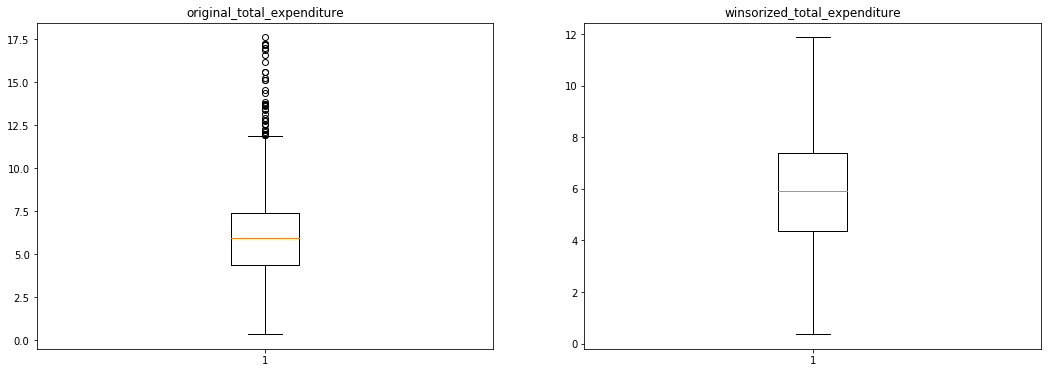

In [104]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_total_expenditure = data_without_outliers['total_expenditure']
plt.boxplot(original_total_expenditure)
plt.title("original_total_expenditure")

plt.subplot(1,2,2)
winsorized_total_expenditure = winsorize(data_without_outliers['total_expenditure'],(0,0.015))
plt.boxplot(winsorized_total_expenditure)
plt.title("winsorized_total_expenditure")

plt.show()

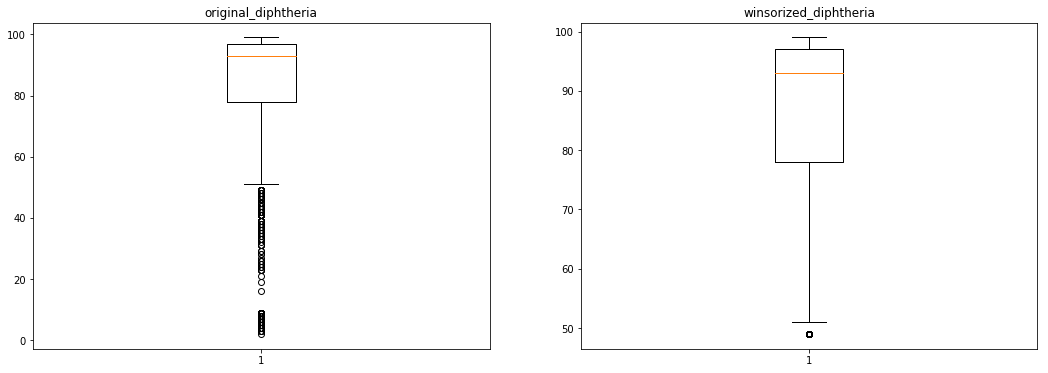

In [105]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_diphtheria = data_without_outliers['diphtheria']
plt.boxplot(original_diphtheria)
plt.title("original_diphtheria")

plt.subplot(1,2,2)
winsorized_diphtheria = winsorize(data_without_outliers['diphtheria'],(0.10,0))
plt.boxplot(winsorized_diphtheria)
plt.title("winsorized_diphtheria")

plt.show()

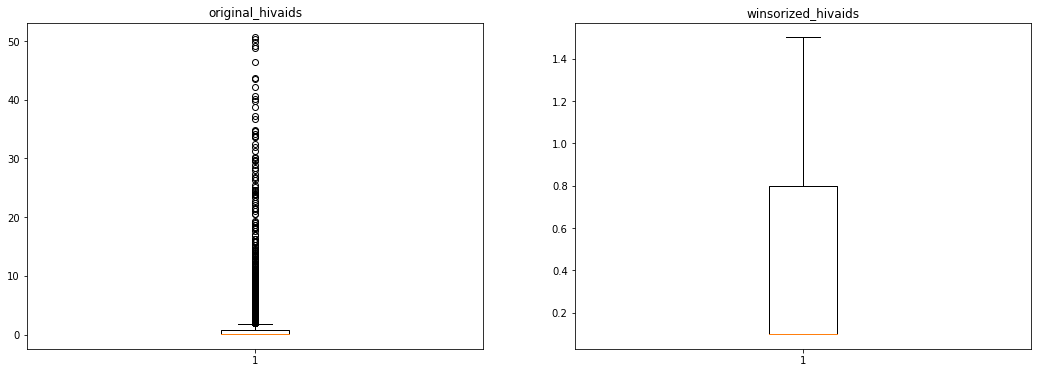

In [106]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_hivaids = data_without_outliers['hivaids']
plt.boxplot(original_hivaids)
plt.title("original_hivaids")

plt.subplot(1,2,2)
winsorized_hivaids = winsorize(data_without_outliers['hivaids'],(0,0.2))
plt.boxplot(winsorized_hivaids)
plt.title("winsorized_hivaids")

plt.show()

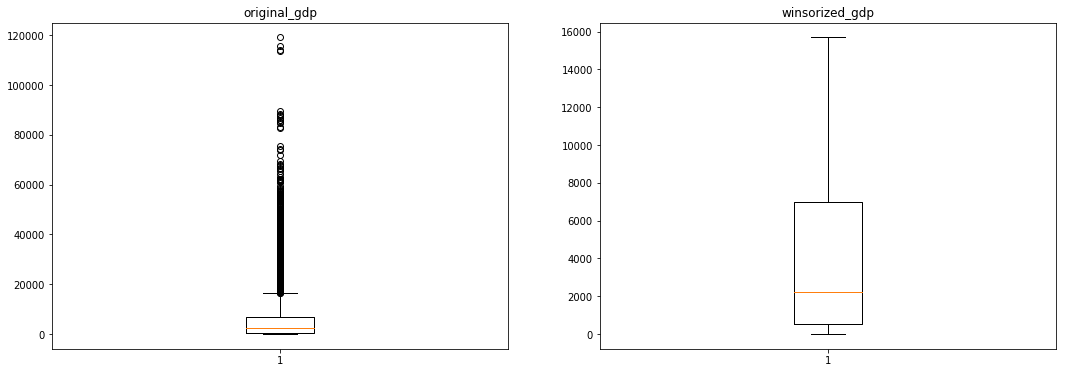

In [107]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_gdp = data_without_outliers['gdp']
plt.boxplot(original_gdp)
plt.title("original_gdp")

plt.subplot(1,2,2)
winsorized_gdp = winsorize(data_without_outliers['gdp'],(0,0.15))
plt.boxplot(winsorized_gdp)
plt.title("winsorized_gdp")

plt.show()

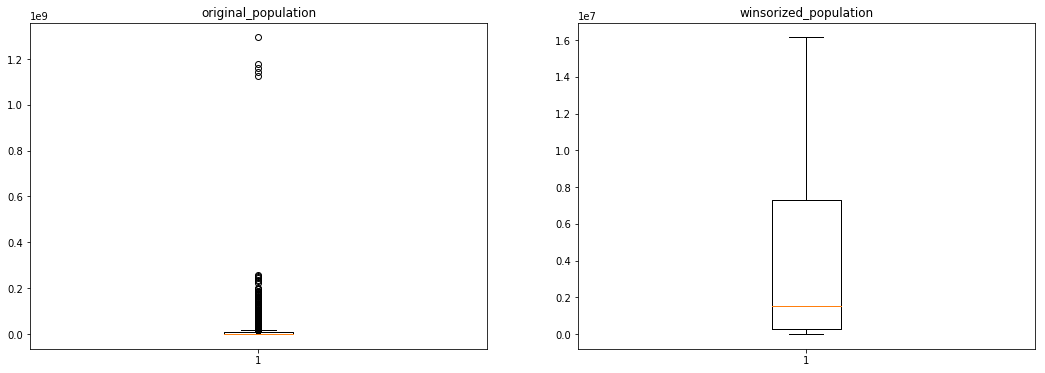

In [108]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_population = data_without_outliers['population']
plt.boxplot(original_population)
plt.title("original_population")

plt.subplot(1,2,2)
winsorized_population = winsorize(data_without_outliers['population'],(0,0.14))
plt.boxplot(winsorized_population)
plt.title("winsorized_population")

plt.show()

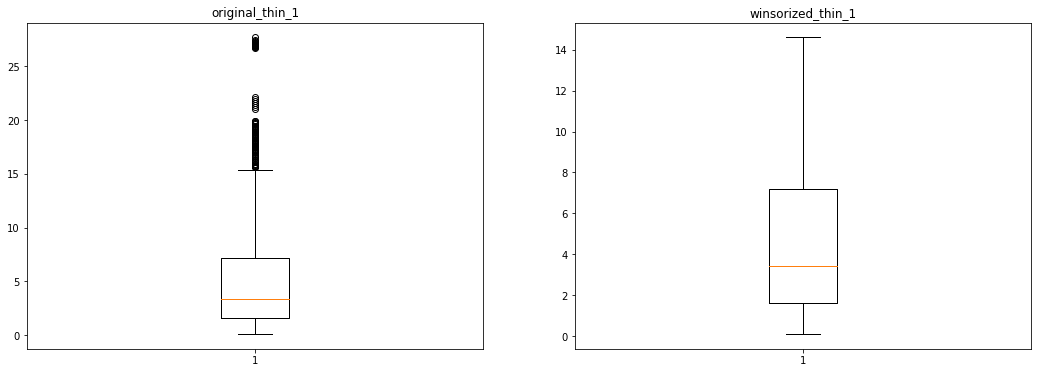

In [109]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thin_1 = data_without_outliers['thin_1']
plt.boxplot(original_thin_1)
plt.title("original_thin_1")

plt.subplot(1,2,2)
winsorized_thin_1 = winsorize(data_without_outliers['thin_1'],(0,0.04))
plt.boxplot(winsorized_thin_1)
plt.title("winsorized_thin_1")

plt.show()

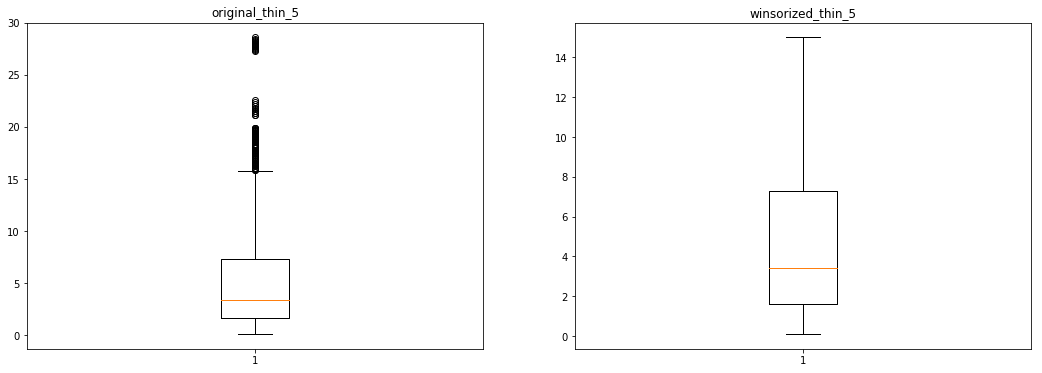

In [110]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thin_5 = data_without_outliers['thin_5']
plt.boxplot(original_thin_5)
plt.title("original_thin_5")

plt.subplot(1,2,2)
winsorized_thin_5 = winsorize(data_without_outliers['thin_5'],(0,0.04))
plt.boxplot(winsorized_thin_5)
plt.title("winsorized_thin_5")

plt.show()

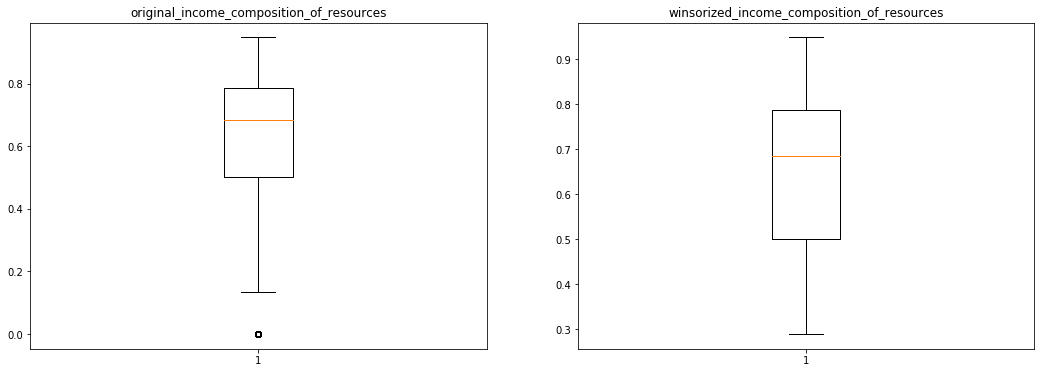

In [111]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_income_composition_of_resources = data_without_outliers['income_composition_of_resources']
plt.boxplot(original_income_composition_of_resources)
plt.title("original_income_composition_of_resources")

plt.subplot(1,2,2)
winsorized_income_composition_of_resources = winsorize(data_without_outliers['income_composition_of_resources'],(0.05,0))
plt.boxplot(winsorized_income_composition_of_resources)
plt.title("winsorized_income_composition_of_resources")

plt.show()


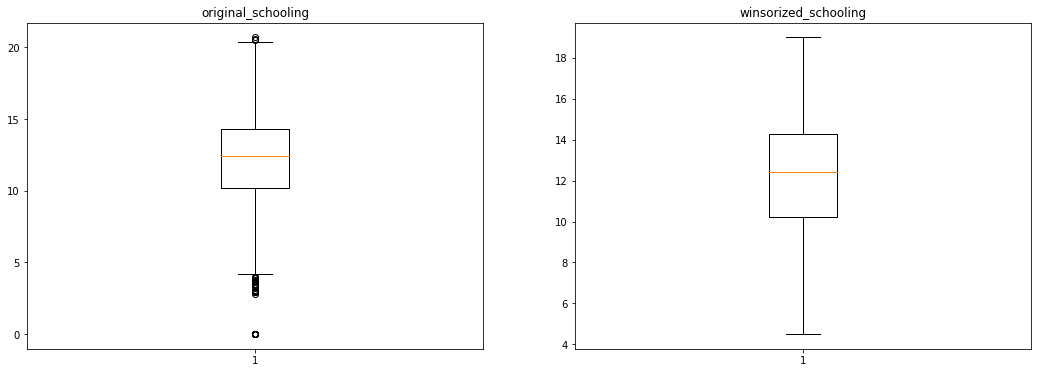

In [112]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_schooling = data_without_outliers['schooling']
plt.boxplot(original_schooling)
plt.title("original_schooling")

plt.subplot(1,2,2)
winsorized_schooling = winsorize(data_without_outliers['schooling'],(0.02,0.01))
plt.boxplot(winsorized_schooling)
plt.title("winsorized_schooling")

plt.show()


In [113]:
data_without_outliers['life_expectancy'] = winsorized_life_expectancy
data_without_outliers['adult_mortality'] = winsorized_adult_mortality
data_without_outliers['infant_deaths'] = winsorized_infant_deaths
data_without_outliers['alcohol'] = winsorized_alcohol
data_without_outliers['percentage_expenditure'] = winsorized_percentage_expenditure
data_without_outliers['hepatitis_b'] = winsorized_hepatitis_b
data_without_outliers['measles'] = winsorized_measles
data_without_outliers['under_five_deaths'] = winsorized_under_five_deaths
data_without_outliers['polio'] = winsorized_polio
data_without_outliers['total_expenditure'] = winsorized_total_expenditure
data_without_outliers['diphtheria'] = winsorized_diphtheria
data_without_outliers['hivaids'] = winsorized_hivaids
data_without_outliers['gdp'] = winsorized_gdp
data_without_outliers['population'] = winsorized_population
data_without_outliers['thin_1'] = winsorized_thin_1
data_without_outliers['thin_5'] = winsorized_thin_5
data_without_outliers['income_composition_of_resources'] = winsorized_income_composition_of_resources
data_without_outliers['schooling'] = winsorized_schooling

In [114]:
data_without_outliers.head(2)

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,polio,total_expenditure,diphtheria,hivaids,gdp,population,thin_1,thin_5,income_composition_of_resources,schooling
0,2015,Developing,65.000,263.000,42,0.010,71.280,65.000,831,19.100,...,52.000,8.160,65.000,0.100,584.259,16148929.000,14.600,15.000,0.479,10.100
1,2014,Developing,59.900,271.000,42,0.010,73.524,62.000,492,18.600,...,58.000,8.180,62.000,0.100,612.697,327582.000,14.600,15.000,0.476,10.000


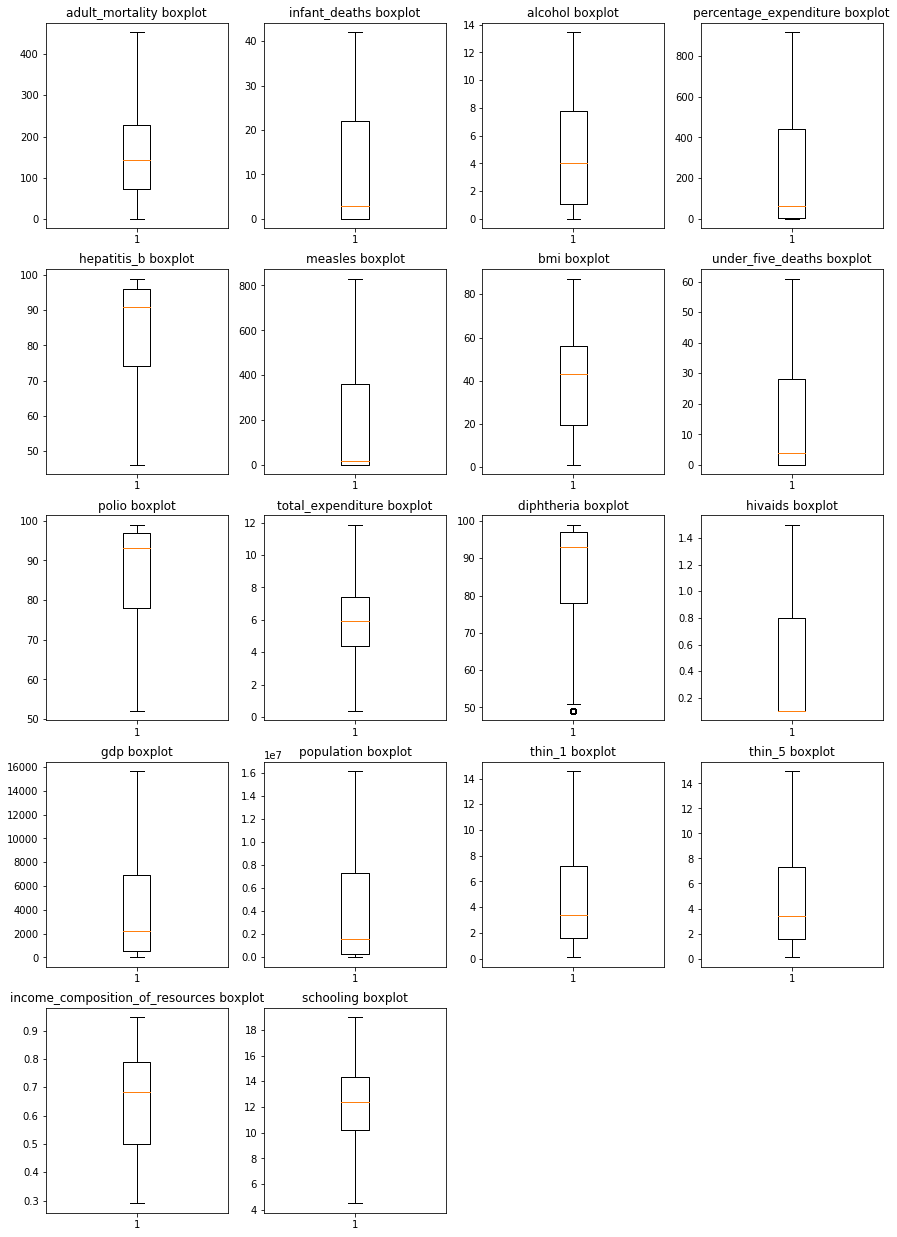

In [115]:
cont_vars = list(data.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
    plt.show()
outliers_visual(data_without_outliers)

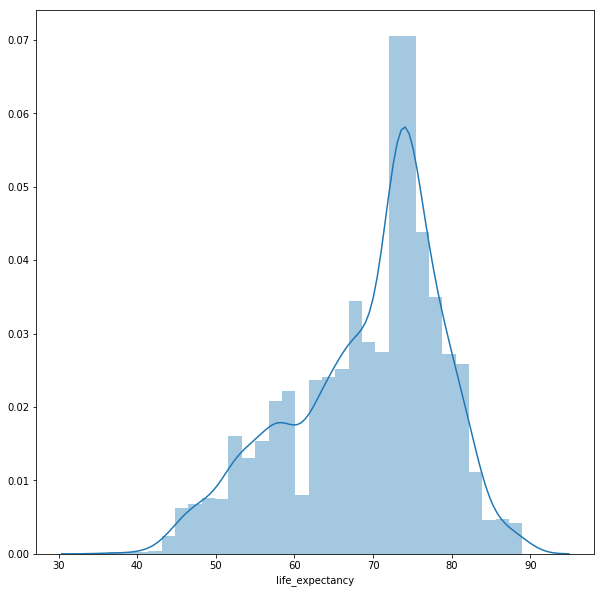

In [116]:
# explolary data analysis
# Check distribution target variable

plt.figure(figsize=(10,10))
plt.tight_layout()
sns.distplot(data['life_expectancy'])

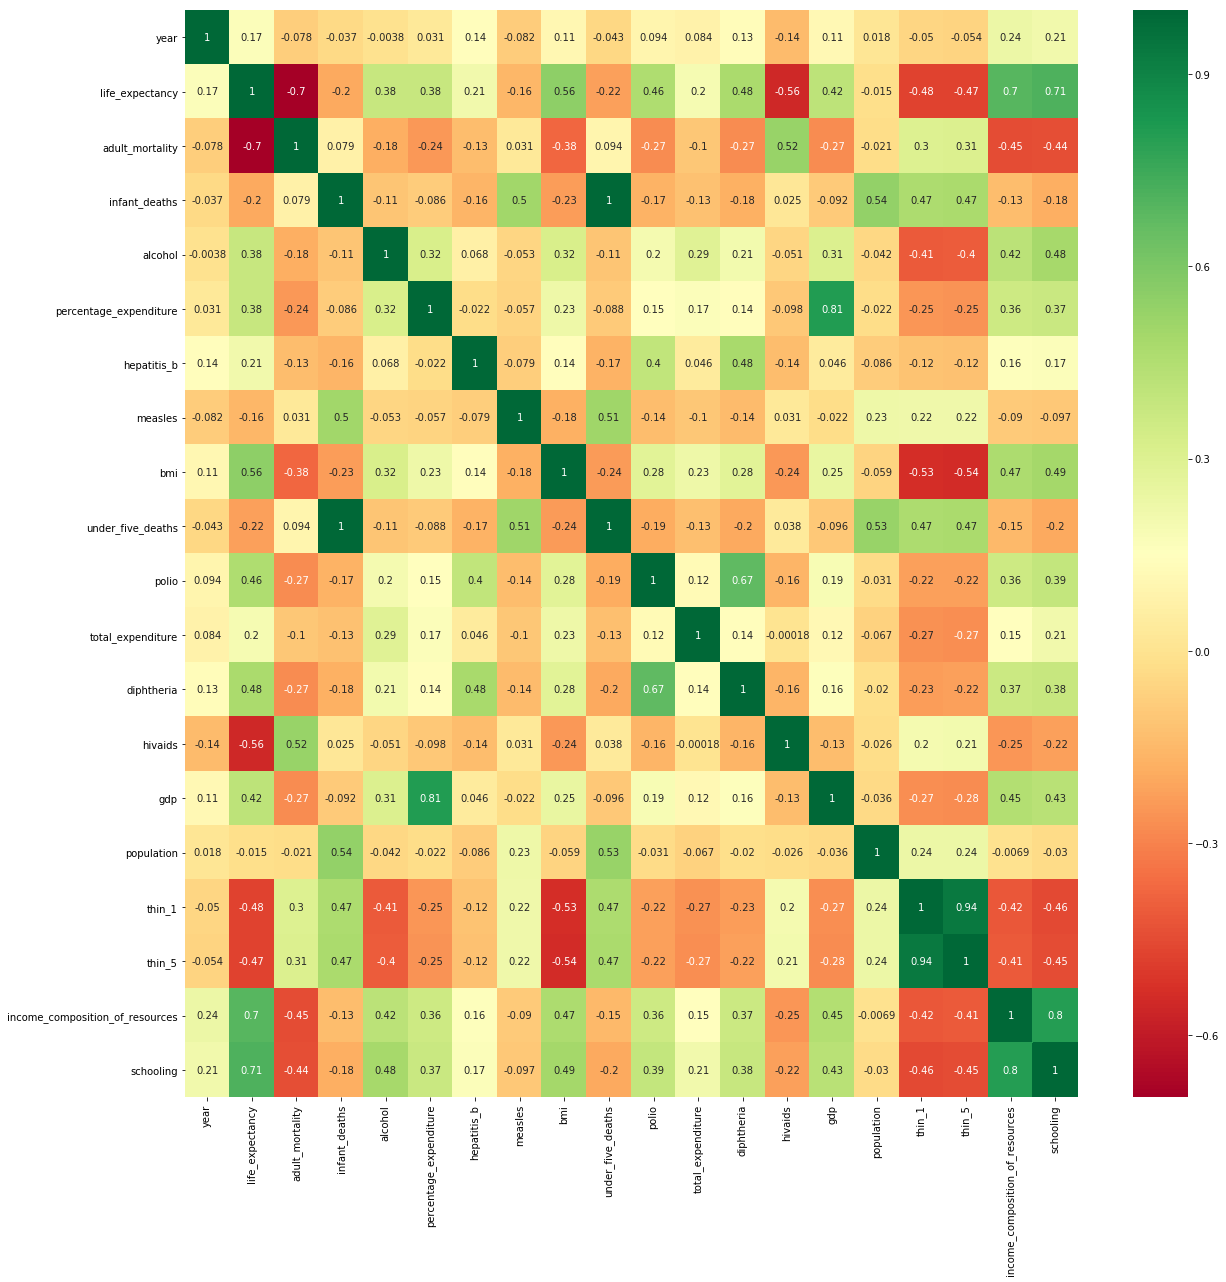

In [117]:
# correlation between the features (target values and columns )

import seaborn as sns
import matplotlib.pyplot as mplt

corrmat = data.corr()
top_corr_features= corrmat.index
mplt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr() ,annot=True , cmap="RdYlGn")

In [118]:
data.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hivaids,gdp,population,thin_1,thin_5,income_composition_of_resources,schooling
year,1.000,0.170,-0.078,-0.037,-0.004,0.031,0.140,-0.082,0.111,-0.043,0.094,0.084,0.134,-0.140,0.115,0.018,-0.050,-0.054,0.237,0.212
life_expectancy,0.170,1.000,-0.696,-0.197,0.381,0.382,0.215,-0.158,0.555,-0.222,0.463,0.197,0.476,-0.556,0.416,-0.015,-0.475,-0.471,0.695,0.714
adult_mortality,-0.078,-0.696,1.000,0.079,-0.183,-0.243,-0.134,0.031,-0.376,0.094,-0.274,-0.102,-0.274,0.523,-0.274,-0.021,0.301,0.308,-0.446,-0.439
infant_deaths,-0.037,-0.197,0.079,1.000,-0.113,-0.086,-0.161,0.501,-0.227,0.997,-0.171,-0.126,-0.175,0.025,-0.092,0.539,0.466,0.471,-0.134,-0.180
alcohol,-0.004,0.381,-0.183,-0.113,1.000,0.322,0.068,-0.053,0.324,-0.110,0.203,0.290,0.211,-0.051,0.308,-0.042,-0.411,-0.399,0.419,0.484
percentage_expenditure,0.031,0.382,-0.243,-0.086,0.322,1.000,-0.022,-0.057,0.227,-0.088,0.147,0.170,0.143,-0.098,0.814,-0.022,-0.252,-0.254,0.359,0.372
hepatitis_b,0.140,0.215,-0.134,-0.161,0.068,-0.022,1.000,-0.079,0.141,-0.167,0.400,0.046,0.482,-0.138,0.046,-0.086,-0.118,-0.122,0.160,0.167
measles,-0.082,-0.158,0.031,0.501,-0.053,-0.057,-0.079,1.000,-0.176,0.508,-0.136,-0.104,-0.142,0.031,-0.022,0.230,0.224,0.220,-0.090,-0.097
bmi,0.111,0.555,-0.376,-0.227,0.324,0.227,0.141,-0.176,1.000,-0.238,0.281,0.231,0.281,-0.242,0.247,-0.059,-0.531,-0.537,0.465,0.494
under_five_deaths,-0.043,-0.222,0.094,0.997,-0.110,-0.088,-0.167,0.508,-0.238,1.000,-0.189,-0.127,-0.196,0.038,-0.096,0.526,0.468,0.472,-0.152,-0.195


In [119]:
data_without_outliers

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,polio,total_expenditure,diphtheria,hivaids,gdp,population,thin_1,thin_5,income_composition_of_resources,schooling
0,2015,Developing,65.000,263.000,42,0.010,71.280,65.000,831,19.100,...,52.000,8.160,65.000,0.100,584.259,16148929.000,14.600,15.000,0.479,10.100
1,2014,Developing,59.900,271.000,42,0.010,73.524,62.000,492,18.600,...,58.000,8.180,62.000,0.100,612.697,327582.000,14.600,15.000,0.476,10.000
2,2013,Developing,59.900,268.000,42,0.010,73.219,64.000,430,18.100,...,62.000,8.130,64.000,0.100,631.745,16148929.000,14.600,15.000,0.470,9.900
3,2012,Developing,59.500,272.000,42,0.010,78.184,67.000,831,17.600,...,67.000,8.520,67.000,0.100,669.959,3696958.000,14.600,15.000,0.463,9.800
4,2011,Developing,59.200,275.000,42,0.010,7.097,68.000,831,17.200,...,68.000,7.870,68.000,0.100,63.537,2978599.000,14.600,15.000,0.454,9.500
5,2010,Developing,58.800,279.000,42,0.010,79.679,66.000,831,16.700,...,66.000,9.200,66.000,0.100,553.329,2883167.000,14.600,15.000,0.448,9.200
6,2009,Developing,58.600,281.000,42,0.010,56.762,63.000,831,16.200,...,63.000,9.420,63.000,0.100,445.893,284331.000,14.600,15.000,0.434,8.900
7,2008,Developing,58.100,287.000,42,0.030,25.874,64.000,831,15.700,...,64.000,8.330,64.000,0.100,373.361,2729431.000,14.600,15.000,0.433,8.700
8,2007,Developing,57.500,295.000,42,0.020,10.910,63.000,831,15.200,...,63.000,6.730,63.000,0.100,369.836,16148929.000,14.600,15.000,0.415,8.400
9,2006,Developing,57.300,295.000,42,0.030,17.172,64.000,831,14.700,...,58.000,7.430,58.000,0.100,272.564,2589345.000,14.600,15.000,0.405,8.100


# Modelling

# Model 1 : A. Model 1 : Using original data


In [120]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr


In [121]:
def linearity(data,target):
    cor_list = []
    for col in data.drop(target, axis = 1).columns:
        if col in data.select_dtypes('category').columns:
            cor_val = spearmanr(data[col], data[target])
        else:
            cor_val = pearsonr(data[col], data[target])
        cor_dict = {"Predictor": col,
                "Correlation": cor_val[0]
               }
        cor_list.append(cor_dict)
        cor_values = pd.DataFrame(cor_list)
    return cor_values


In [122]:
linearity(data,'life_expectancy')

,Correlation,Predictor
0,0.170,year
1,-0.545,status
2,-0.696,adult_mortality
3,-0.197,infant_deaths
4,0.381,alcohol
5,0.382,percentage_expenditure
6,0.215,hepatitis_b
7,-0.158,measles
8,0.555,bmi
9,-0.222,under_five_deaths


In [123]:
X_ = data.drop(["life_expectancy"], axis = 1)
y = data.life_expectancy.values

In [124]:
X = pd.get_dummies(X_, columns = data.select_dtypes('category').columns, drop_first = True)
X.head()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hivaids,gdp,population,thin_1,thin_5,income_composition_of_resources,schooling,status_Developing
0,2015,263.000,62,0.010,71.280,65.000,1154,19.100,83,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100,1
1,2014,271.000,64,0.010,73.524,62.000,492,18.600,86,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000,1
2,2013,268.000,66,0.010,73.219,64.000,430,18.100,89,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900,1
3,2012,272.000,69,0.010,78.184,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800,1
4,2011,275.000,71,0.010,7.097,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500,1


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("y Train:", y_train.shape)
print("y Test:", y_test.shape)

X Train: (2350, 20)
X Test: (588, 20)
y Train: (2350,)
y Test: (588,)


In [126]:
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [127]:
predictions = lm.predict(X_test)
pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pred1 = pred.head(10)
pred1


,Actual,Predicted
0,73.700,67.259
1,75.900,77.118
2,74.200,74.927
3,76.800,77.493
4,51.900,47.455
5,49.600,50.431
6,67.400,67.871
7,73.900,70.722
8,77.200,74.405
9,55.000,54.585


In [128]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 2.829179854291739
Mean Squared Error: 14.822005464326935
Root Mean Squared Error: 3.849935774052203


#  model 2 : Using data without outliers

In [129]:
X_model_new = data_without_outliers[['year', 'status', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hivaids', 'gdp', 'population', 'thin_1', 'thin_5',
       'income_composition_of_resources', 'schooling']]
X.head()
y_model = data_without_outliers["life_expectancy"]

In [130]:
y_model

0      65.000
1      59.900
2      59.900
3      59.500
4      59.200
5      58.800
6      58.600
7      58.100
8      57.500
9      57.300
10     57.300
11     57.000
12     56.700
13     56.200
14     55.300
15     54.800
16     77.800
17     77.500
18     77.200
19     76.900
20     76.600
21     76.200
22     76.100
23     75.300
24     75.900
25     74.200
26     73.500
27     73.000
28     72.800
29     73.300
        ...  
2908   63.000
2909   59.200
2910   58.200
2911   58.000
2912   57.400
2913   55.700
2914   52.600
2915   58.000
2916   49.300
2917   47.900
2918   46.400
2919   45.600
2920   45.600
2921   45.600
2922   67.000
2923   59.200
2924   58.000
2925   56.600
2926   54.900
2927   52.400
2928   50.000
2929   48.200
2930   46.600
2931   45.600
2932   45.600
2933   45.600
2934   45.600
2935   45.600
2936   45.600
2937   46.000
Name: life_expectancy, Length: 2938, dtype: float64

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X_model_new, y_model, test_size = 0.2, random_state = 42)

In [132]:
X_model_new.head()

,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hivaids,gdp,population,thin_1,thin_5,income_composition_of_resources,schooling
0,2015,Developing,263.000,42,0.010,71.280,65.000,831,19.100,61,52.000,8.160,65.000,0.100,584.259,16148929.000,14.600,15.000,0.479,10.100
1,2014,Developing,271.000,42,0.010,73.524,62.000,492,18.600,61,58.000,8.180,62.000,0.100,612.697,327582.000,14.600,15.000,0.476,10.000
2,2013,Developing,268.000,42,0.010,73.219,64.000,430,18.100,61,62.000,8.130,64.000,0.100,631.745,16148929.000,14.600,15.000,0.470,9.900
3,2012,Developing,272.000,42,0.010,78.184,67.000,831,17.600,61,67.000,8.520,67.000,0.100,669.959,3696958.000,14.600,15.000,0.463,9.800
4,2011,Developing,275.000,42,0.010,7.097,68.000,831,17.200,61,68.000,7.870,68.000,0.100,63.537,2978599.000,14.600,15.000,0.454,9.500


In [133]:
numeric_features = ['year', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hivaids', 'gdp', 'population', 'thin_1', 'thin_5',
       'income_composition_of_resources', 'schooling']
categorical_features = [ 'status']

In [134]:
from sklearn.pipeline import Pipeline
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
   
])

In [135]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

In [136]:
# modelling using linear regressions

In [137]:
lm = Pipeline([
    ('preprocessor', preprocessor),
    ('LRegressor', LinearRegression())
])

In [138]:
lm.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('onehot', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>...gressor', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [139]:
predict= lm.predict(X_test)

In [140]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(predict,Y_test)

0.8538881487864722

In [141]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [142]:
wml_credentials = {
  "apikey": "4pYzXYA8l19CHsikYrTd2KT8sCX6vj3cWpfvWE-xohBn",
  "iam_apikey_description": "Auto-generated for key ae4c8d36-e584-47df-b8a2-90a79af901ca",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/6c83daa94a51422a8ef78445330723e7::serviceid:ServiceId-f26bf6d0-5f45-4e91-aa22-499f48fca887",
  "instance_id": "613e8f87-453c-41c0-ae8a-301fb3b1724d",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [143]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [144]:
model_props={
    client.repository.ModelMetaNames.AUTHOR_NAME : "sakshi",
        client.repository.ModelMetaNames.AUTHOR_EMAIL : "jain.sakshi930@gmail.com",
        client.repository.ModelMetaNames.NAME : "life expectancy "
}

In [145]:
model_artifact=client.repository.store_model(lm,meta_props=model_props)

In [146]:
model_artifact

{'metadata': {'guid': '2ede81fd-1524-4d29-bb1b-f3c1279ae542',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/613e8f87-453c-41c0-ae8a-301fb3b1724d/published_models/2ede81fd-1524-4d29-bb1b-f3c1279ae542',
  'created_at': '2020-06-15T09:49:12.437Z',
  'modified_at': '2020-06-15T09:49:12.498Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/613e8f87-453c-41c0-ae8a-301fb3b1724d/published_models/2ede81fd-1524-4d29-bb1b-f3c1279ae542/learning_configuration',
  'author': {'name': 'sakshi'},
  'name': 'life expectancy ',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/613e8f87-453c-41c0-ae8a-301fb3b1724d/published_models/2ede81fd-1524-4d29-bb1b-f3c1279ae542/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/613e8f87-453c-41c0-ae8a-301fb3b1724d/published_models/2ede81fd-1524-4d29-bb1b-f3c1279ae542/feedback',
  'latest_version': {'url': '

In [147]:
guid=client.repository.get_model_uid(model_artifact)

In [148]:
guid

'2ede81fd-1524-4d29-bb1b-f3c1279ae542'

In [149]:
deploy=client.deployments.create(guid,name="life expectancy")



#######################################################################################

Synchronous deployment creation for uid: '2ede81fd-1524-4d29-bb1b-f3c1279ae542' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='1557e6a5-b32f-411f-ae87-db4e25e7f3b1'
------------------------------------------------------------------------------------------------




In [150]:
deploy

{'metadata': {'guid': '1557e6a5-b32f-411f-ae87-db4e25e7f3b1',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/613e8f87-453c-41c0-ae8a-301fb3b1724d/deployments/1557e6a5-b32f-411f-ae87-db4e25e7f3b1',
  'created_at': '2020-06-15T09:49:14.773Z',
  'modified_at': '2020-06-15T09:49:15.034Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'life expectancy',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/613e8f87-453c-41c0-ae8a-301fb3b1724d/deployments/1557e6a5-b32f-411f-ae87-db4e25e7f3b1/online',
  'deployable_asset': {'name': 'life expectancy ',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/613e8f87-453c-41c0-ae8a-301fb3b1724d/published_models/2ede81fd-1524-4d29-bb1b-f3c1279ae542',
   'guid': '2ede81fd-1524-4d29-bb1b-f3c1279ae542',
   'created_at': '2020-06-15T09:49:14.749Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_type': 'scikit-learn-0.20',
  'status'

In [158]:
scoring_endpoint=client.deployments.get_scoring_url(deploy)

In [159]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/613e8f87-453c-41c0-ae8a-301fb3b1724d/deployments/1557e6a5-b32f-411f-ae87-db4e25e7f3b1/online'

In [153]:
# client.deployments.delete("407662a6-fc1c-4b68-872a-a998c459f707")

{"trace":"xpd5anau0kgi","errors":[{"code":"not_found","message":"Requested object could not be found."}]}


'FAILED'

In [154]:
client.deployments.list()

------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME             TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
1557e6a5-b32f-411f-ae87-db4e25e7f3b1  life expectancy  online  DEPLOY_SUCCESS  2020-06-15T09:49:14.773Z  scikit-learn-0.20  model
1dc581ad-6ac4-447d-a27a-755416aaa39f  life expectancy  online  DEPLOY_SUCCESS  2020-06-15T08:55:49.774Z  scikit-learn-0.20  model
------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------


In [155]:
client.deployments.get_scoring_endpoint(deploy)

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/613e8f87-453c-41c0-ae8a-301fb3b1724d/deployments/1557e6a5-b32f-411f-ae87-db4e25e7f3b1/online'

In [165]:
scoring_payload = {"fields": ['year', 'status', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hivaids', 'gdp', 'population', 'thin_1', 'thin_5',
       'income_composition_of_resources', 'schooling'],"values":[[2009,'Developing',281,77,0.01,56.2777,63,2861,16.2,106,63,9.42,63,0.1,445.893,284331,18.6,18.7,0.434,8.9]]}
predictions = client.deployments.score(scoring_endpoint, scoring_payload)
print(predictions)



{'fields': ['prediction'], 'values': [[58.532968867344806]]}
